In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import date, datetime

In [2]:
df = pd.read_excel('espessura-vida-serie.xlsx')
df

,Data,Modelo,Executante,Cor,PJI,Camada,Ponto,Espessura de Camada,Regiao,Lado,Ponto Oposto,Espessura Oposta,Diff Lados
0,07/05/2019,H79,JEAN,BLANC GLACIER,1922241,E-Coat,1,19.046,capo,E,9.0,18.500,0.546
1,07/05/2019,H79,JEAN,BLANC GLACIER,1922241,E-Coat,2,20.113,capo,E,10.0,19.315,0.798
2,07/05/2019,H79,JEAN,BLANC GLACIER,1922241,E-Coat,3,20.273,capo,E,11.0,19.494,0.779
3,07/05/2019,H79,JEAN,BLANC GLACIER,1922241,E-Coat,4,20.664,capo,E,12.0,20.066,0.598
4,07/05/2019,H79,JEAN,BLANC GLACIER,1922241,E-Coat,5,18.676,capo,C,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154591,26/08/2019,BBB,JEAN,BLANC GLACIER,3531026,ClearCoat,76,41.654,porta-Diant,D,18.0,39.414,2.240
154592,26/08/2019,BBB,JEAN,BLANC GLACIER,3531026,ClearCoat,77,41.192,paralama-Diant,D,13.0,39.719,1.473
154593,26/08/2019,BBB,JEAN,BLANC GLACIER,3531026,ClearCoat,78,44.882,paralama-Diant,D,14.0,42.210,2.672
154594,26/08/2019,BBB,JEAN,BLANC GLACIER,3531026,ClearCoat,79,42.897,paralama-Diant,D,12.0,43.826,0.929


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154596 entries, 0 to 154595
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Data                 154596 non-null  object 
 1   Modelo               154596 non-null  object 
 2   Executante           154596 non-null  object 
 3   Cor                  154596 non-null  object 
 4   PJI                  154596 non-null  int64  
 5   Camada               154596 non-null  object 
 6   Ponto                154596 non-null  int64  
 7   Espessura de Camada  154596 non-null  float64
 8   Regiao               154596 non-null  object 
 9   Lado                 154596 non-null  object 
 10  Ponto Oposto         137904 non-null  float64
 11  Espessura Oposta     131964 non-null  float64
 12  Diff Lados           131964 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 15.3+ MB


In [4]:
df.describe()

,PJI,Ponto,Espessura de Camada,Ponto Oposto,Espessura Oposta,Diff Lados
count,1.545960e+05,154596.000000,154596.000000,137904.000000,131964.000000,131964.000000
mean,3.200400e+06,38.829698,29.184909,42.888966,29.298944,2.370342
std,1.032489e+06,22.432920,11.255974,24.421981,11.268385,2.388156
min,1.031382e+06,1.000000,8.073000,1.000000,8.073000,0.000000
25%,2.241157e+06,19.000000,19.362000,21.000000,19.475000,0.643000
50%,3.212529e+06,39.000000,26.659000,43.000000,26.751000,1.579000
75%,4.040487e+06,58.000000,38.914000,62.000000,38.993250,3.316250
max,5.206815e+06,82.000000,60.990000,97.000000,60.990000,20.427000


In [5]:
df.isna().sum()
df = df.dropna()
df = df.drop('Executante', axis = 1)

In [6]:
df.columns

Index(['Data', 'Modelo', 'Cor', 'PJI', 'Camada', 'Ponto',
       'Espessura de Camada', 'Regiao', 'Lado', 'Ponto Oposto',
       'Espessura Oposta', 'Diff Lados'],
      dtype='object')

In [7]:
df.groupby(["Modelo", "Cor"]).mean()

PJI      Ponto  Espessura de Camada  \
Modelo Cor                                                           
B52    BEIGE DUNE     4.077294e+06  36.875000            28.966038   
       BLANC GLACIER  3.393055e+06  36.875000            29.149624   
       BLEU IRON      3.291184e+06  36.875000            27.964112   
       GRIS CASSIOPE  3.980575e+06  36.875000            29.752271   
       GRIS ETOILE    3.084540e+06  36.875000            30.000359   
       NOIR NACRE     3.324328e+06  36.875000            28.658151   
       ROUGE DE FEU   4.184253e+06  36.875000            29.386406   
       ROUGE VIF      3.330266e+06  36.875000            28.438383   
BBB    BLANC GLACIER  2.956890e+06  41.905405            29.077726   
       GRIS ETOILE    3.156947e+06  41.905405            29.779988   
       IVOIRE         3.872706e+06  41.905405            29.415074   
       NOIR NACRE     3.280058e+06  41.905405            29.078850   
       ORANGE OCRE    3.186906e+06  41.905405            28.922779   
       ROUGE DE FEU   3.737824e+06  41.905405            30.014068   
H79    BLANC GLACIER  3.293938e+06  47.625000            28.743228   
       GRIS CASSIOPE  4.530550e+06  47.625000            30.451554   
       GRIS ETOILE    2.854044e+06  47.625000            29.135929   
       NOIR NACRE     3.170045e+06  47.625000            27.302384   
       ROUGE DE FEU   2.725928e+06  47.625000            28.705368   
HHA    BLANC GLACIER  2.996814e+06  41.365079            29.697974   
       GRIS ACIER     1.440678e+06  41.365079            28.865913   
       GRIS CASSIOPE  4.050426e+06  41.365079            29.583059   
       GRIS ETOILE    2.883777e+06  41.365079            29.949832   
       IVOIRE         2.780669e+06  41.365079            29.489485   
       NOIR NACRE     3.727248e+06  41.365079            28.351655   
       ROUGE DE FEU   3.214279e+06  41.365079            29.044792   
L52    BLANC GLACIER  3.459137e+06  37.328125            29.166924   
       GRIS CASSIOPE  3.141632e+06  37.328125            28.956608   
       GRIS ETOILE    3.192653e+06  37.328125            30.080978   
       NOIR NACRE     3.213832e+06  37.328125            28.217538   
       ROUGE VIF      3.894323e+06  37.328125            28.962346   

                      Ponto Oposto  Espessura Oposta  Diff Lados  
Modelo Cor                                                        
B52    BEIGE DUNE        36.875000         28.966038    2.266383  
       BLANC GLACIER     36.875000         29.149624    2.233356  
       BLEU IRON         36.875000         27.964112    2.155589  
       GRIS CASSIOPE     36.875000         29.752271    2.178673  
       GRIS ETOILE       36.875000         30.000359    2.253489  
       NOIR NACRE        36.875000         28.658151    2.409747  
       ROUGE DE FEU      36.875000         29.386406    2.110620  
       ROUGE VIF         36.875000         28.438383    2.216516  
BBB    BLANC GLACIER     41.905405         29.077726    2.365939  
       GRIS ETOILE       41.905405         29.779988    2.431474  
       IVOIRE            41.905405         29.415074    2.367909  
       NOIR NACRE        41.905405         29.078850    2.327794  
       ORANGE OCRE       41.905405         28.922779    2.279920  
       ROUGE DE FEU      41.905405         30.014068    2.474553  
H79    BLANC GLACIER     47.660714         28.745440    2.669481  
       GRIS CASSIOPE     47.660714         30.466719    2.514808  
       GRIS ETOILE       47.660714         29.126392    2.695752  
       NOIR NACRE        47.660714         27.298031    2.572347  
       ROUGE DE FEU      47.660714         28.711837    2.323299  
HHA    BLANC GLACIER     41.126984         29.666579    2.514149  
       GRIS ACIER        41.126984         28.812766    2.810329  
       GRIS CASSIOPE     41.126984         29.555750    2.473979  
       GRIS ETOILE       41.126984         29.917267    2.526892  
       IVOIRE            41.126984         29

In [8]:
df_L52 = df[df['Modelo']=='L52']
df_L52

,Data,Modelo,Cor,PJI,Camada,Ponto,Espessura de Camada,Regiao,Lado,Ponto Oposto,Espessura Oposta,Diff Lados
4800,01/07/2019,L52,GRIS CASSIOPE,2631283,E-Coat,1,23.950,capo,D,9.0,23.741,0.209
4801,01/07/2019,L52,GRIS CASSIOPE,2631283,E-Coat,2,24.644,capo,D,10.0,25.238,0.594
4802,01/07/2019,L52,GRIS CASSIOPE,2631283,E-Coat,3,22.858,capo,D,7.0,22.996,0.138
4803,01/07/2019,L52,GRIS CASSIOPE,2631283,E-Coat,4,24.931,capo,D,8.0,24.972,0.041
4806,01/07/2019,L52,GRIS CASSIOPE,2631283,E-Coat,7,22.996,capo,E,3.0,22.858,0.138
...,...,...,...,...,...,...,...,...,...,...,...,...
149215,12/06/2019,L52,BLANC GLACIER,2440064,ClearCoat,67,55.245,porta-Diant,D,17.0,49.980,5.265
149216,12/06/2019,L52,BLANC GLACIER,2440064,ClearCoat,68,50.032,paralama-Diant,D,14.0,42.726,7.306
149217,12/06/2019,L52,BLANC GLACIER,2440064,ClearCoat,69,45.267,paralama-Diant,D,13.0,51.314,6.047
149218,12/06/2019,L52,BLANC GLACIER,2440064,ClearCoat,70,44.010,paralama-Diant,D,12.0,48.247,4.237


In [9]:
df_L52.groupby(['Cor', 'Camada'])['Diff Lados'].std()

Cor            Camada      
BLANC GLACIER  Base            1.161486
               ClearCoat       2.861820
               E-Coat          0.864832
               Medium Prime    2.178041
GRIS CASSIOPE  Base            1.036934
               ClearCoat       2.748775
               E-Coat          0.806147
               Medium Prime    1.808351
GRIS ETOILE    Base            1.267756
               ClearCoat       2.827799
               E-Coat          0.850640
               Medium Prime    1.955011
NOIR NACRE     Base            1.582721
               ClearCoat       2.862119
               E-Coat          0.876900
               Medium Prime    1.829899
ROUGE VIF      Base            1.416570
               ClearCoat       2.802456
               E-Coat          1.064079
               Medium Prime    2.265096
Name: Diff Lados, dtype: float64

In [10]:
df_L52_blanc = df_L52[(df_L52['Cor']=='BLANC GLACIER')&(df_L52['Camada']=='Base')&(df_L52['Regiao']=='capo')]

In [11]:
df_L52_blanc.index = pd.to_datetime(df_L52_blanc['Data'],format='%d/%m/%Y')


In [12]:
 df_L52_blanc.groupby(pd.Grouper(freq='M')).std()

,PJI,Ponto,Espessura de Camada,Ponto Oposto,Espessura Oposta,Diff Lados
Data,,,,,,
2019-04-30,119221.566200,3.242348,0.988854,3.242348,0.988854,0.863492
2019-05-31,150046.653532,3.230536,1.383115,3.230536,1.383115,0.932666
2019-06-30,55740.269696,3.242348,1.118939,3.242348,1.118939,0.861859
2019-07-31,422383.028156,3.230536,1.216274,3.230536,1.216274,0.839144
2019-08-31,0.000000,3.422614,1.252617,3.422614,1.252617,1.133112
2019-09-30,252014.847658,3.230536,1.265441,3.230536,1.265441,0.866515
2019-10-31,181521.104415,3.230536,1.267082,3.230536,1.267082,0.934139
2019-11-30,146559.096347,3.230536,1.181490,3.230536,1.181490,0.972096
2019-12-31,98660.087908,3.252790,1.188671,3.252790,1.188671,0.879090


In [13]:
df_L52_blanc['Data'] = df_L52_blanc['Data'].apply(pd.to_datetime)
df_L52_blanc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 400 entries, 2019-07-02 to 2019-06-12
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 400 non-null    datetime64[ns]
 1   Modelo               400 non-null    object        
 2   Cor                  400 non-null    object        
 3   PJI                  400 non-null    int64         
 4   Camada               400 non-null    object        
 5   Ponto                400 non-null    int64         
 6   Espessura de Camada  400 non-null    float64       
 7   Regiao               400 non-null    object        
 8   Lado                 400 non-null    object        
 9   Ponto Oposto         400 non-null    float64       
 10  Espessura Oposta     400 non-null    float64       
 11  Diff Lados           400 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 40.6+

<ipython-input-13-de80236f863a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_L52_blanc['Data'] = df_L52_blanc['Data'].apply(pd.to_datetime)


In [14]:
df_L52_blanc_oct = df_L52_blanc.loc['2019-10-23': '2019-10-23']

In [15]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_L52_blanc_oct

,Data,Modelo,Cor,PJI,Camada,Ponto,Espessura de Camada,Regiao,Lado,Ponto Oposto,Espessura Oposta,Diff Lados
Data,,,,,,,,,,,,
2019-10-23,2019-10-23,L52,BLANC GLACIER,4320165,Base,1,16.397,capo,D,9.0,18.409,2.012
2019-10-23,2019-10-23,L52,BLANC GLACIER,4320165,Base,2,16.505,capo,D,10.0,17.205,0.700
2019-10-23,2019-10-23,L52,BLANC GLACIER,4320165,Base,3,15.679,capo,D,7.0,17.468,1.789
2019-10-23,2019-10-23,L52,BLANC GLACIER,4320165,Base,4,16.616,capo,D,8.0,16.755,0.139
2019-10-23,2019-10-23,L52,BLANC GLACIER,4320165,Base,7,17.468,capo,E,3.0,15.679,1.789
2019-10-23,2019-10-23,L52,BLANC GLACIER,4320165,Base,8,16.755,capo,E,4.0,16.616,0.139
2019-10-23,2019-10-23,L52,BLANC GLACIER,4320165,Base,9,18.409,capo,E,1.0,16.397,2.012
2019-10-23,2019-10-23,L52,BLANC GLACIER,4320165,Base,10,17.205,capo,E,2.0,16.505,0.700
2019-10-23,2019-10-23,L52,BLANC GLACIER,4331635,Base,1,17.203,capo,D,9.0,14.946,2.257


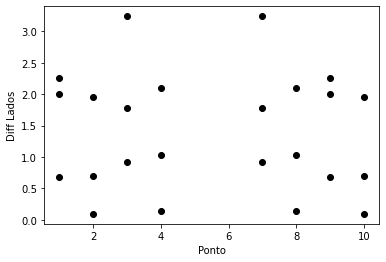

In [16]:
X = df_L52_blanc_oct[["Ponto","Diff Lados"]]
#Visualise data points
plt.scatter(X["Ponto"],X["Diff Lados"],c='black')
plt.xlabel('Ponto')
plt.ylabel('Diff Lados')
plt.show()

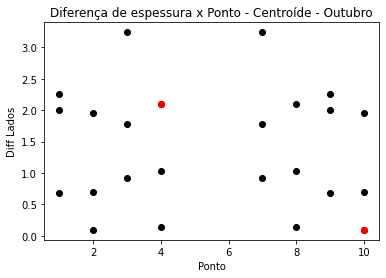

In [17]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=2

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Ponto"],X["Diff Lados"],c='black')
plt.scatter(Centroids["Ponto"],Centroids["Diff Lados"],c='red')
plt.xlabel('Ponto')
plt.ylabel('Diff Lados')
plt.title("Diferença de espessura x Ponto - Centroíde - Outubro")
plt.show()

In [18]:
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Ponto"]-row_d["Ponto"])**2
            d2=(row_c["Diff Lados"]-row_d["Diff Lados"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Diff Lados","Ponto"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Diff Lados'] - Centroids['Diff Lados']).sum() + (Centroids_new['Ponto'] - Centroids['Ponto']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Diff Lados","Ponto"]]

-0.8796904761904769
0.0


<ipython-input-18-ae31ccb2d9ce>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-18-ae31ccb2d9ce>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


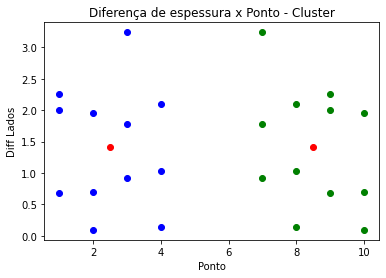

In [19]:
color=['blue','green']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Ponto"],data["Diff Lados"],c=color[k])
plt.scatter(Centroids["Ponto"],Centroids["Diff Lados"],c='red')
plt.xlabel('Ponto')
plt.ylabel('Diff Lados')
plt.title("Diferença de espessura x Ponto - Cluster")
plt.show()

In [20]:
df_L52_blanc_set = df_L52_blanc.loc['2019-09-23': '2019-09-23']

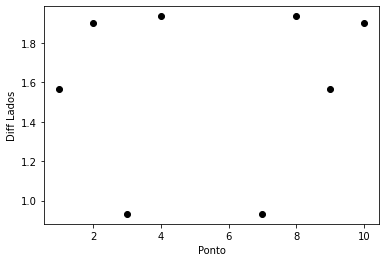

In [21]:
X = df_L52_blanc_set[["Ponto","Diff Lados"]]
#Visualise data points
plt.scatter(X["Ponto"],X["Diff Lados"],c='black')
plt.xlabel('Ponto')
plt.ylabel('Diff Lados')
plt.show()

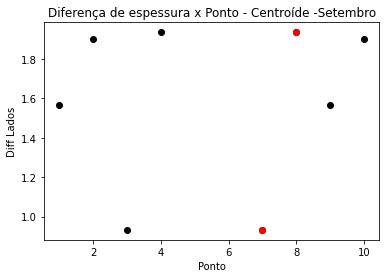

In [22]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=2

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Ponto"],X["Diff Lados"],c='black')
plt.scatter(Centroids["Ponto"],Centroids["Diff Lados"],c='red')
plt.xlabel('Ponto')
plt.ylabel('Diff Lados')
plt.title("Diferença de espessura x Ponto - Centroíde -Setembro")
plt.show()

In [23]:
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Ponto"]-row_d["Ponto"])**2
            d2=(row_c["Diff Lados"]-row_d["Diff Lados"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Diff Lados","Ponto"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Diff Lados'] - Centroids['Diff Lados']).sum() + (Centroids_new['Ponto'] - Centroids['Ponto']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Diff Lados","Ponto"]]

-1.4868666666666663
0.0


<ipython-input-23-ae31ccb2d9ce>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-23-ae31ccb2d9ce>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


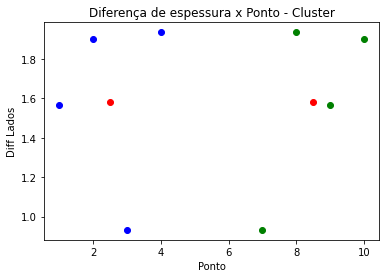

In [24]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Ponto"],data["Diff Lados"],c=color[k])
plt.scatter(Centroids["Ponto"],Centroids["Diff Lados"],c='red')
plt.xlabel('Ponto')
plt.ylabel('Diff Lados')
plt.title("Diferença de espessura x Ponto - Cluster")
plt.show()

In [25]:
df_L52_blanc_jul = df_L52_blanc.loc['2019-07-22': '2019-07-22']

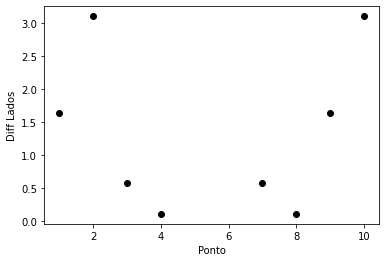

In [26]:
X = df_L52_blanc_jul[["Ponto","Diff Lados"]]
#Visualise data points
plt.scatter(X["Ponto"],X["Diff Lados"],c='black')
plt.xlabel('Ponto')
plt.ylabel('Diff Lados')
plt.show()

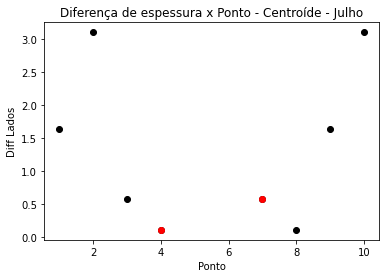

In [27]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=2

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Ponto"],X["Diff Lados"],c='black')
plt.scatter(Centroids["Ponto"],Centroids["Diff Lados"],c='red')
plt.xlabel('Ponto')
plt.ylabel('Diff Lados')
plt.title("Diferença de espessura x Ponto - Centroíde - Julho")
plt.show()

In [28]:
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Ponto"]-row_d["Ponto"])**2
            d2=(row_c["Diff Lados"]-row_d["Diff Lados"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Diff Lados","Ponto"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Diff Lados'] - Centroids['Diff Lados']).sum() + (Centroids_new['Ponto'] - Centroids['Ponto']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Diff Lados","Ponto"]]

0.0


<ipython-input-28-ae31ccb2d9ce>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-28-ae31ccb2d9ce>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


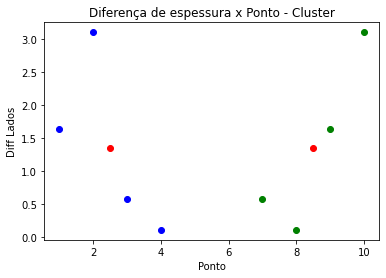

In [29]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Ponto"],data["Diff Lados"],c=color[k])
plt.scatter(Centroids["Ponto"],Centroids["Diff Lados"],c='red')
plt.xlabel('Ponto')
plt.ylabel('Diff Lados')
plt.title("Diferença de espessura x Ponto - Cluster")
plt.show()

In [30]:
df_L52_blanc_jul = df_L52_blanc.loc['2019-11-27': '2019-11-27']

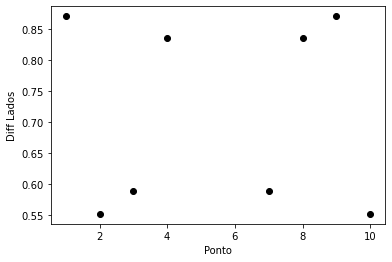

In [31]:
X = df_L52_blanc_jul[["Ponto","Diff Lados"]]
#Visualise data points
plt.scatter(X["Ponto"],X["Diff Lados"],c='black')
plt.xlabel('Ponto')
plt.ylabel('Diff Lados')
plt.show()

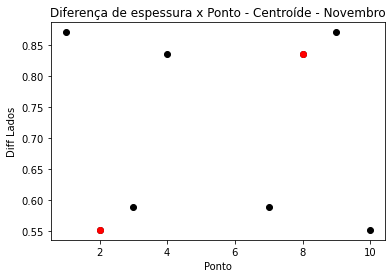

In [32]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=2

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Ponto"],X["Diff Lados"],c='black')
plt.scatter(Centroids["Ponto"],Centroids["Diff Lados"],c='red')
plt.xlabel('Ponto')
plt.ylabel('Diff Lados')
plt.title("Diferença de espessura x Ponto - Centroíde - Novembro")
plt.show()

In [33]:
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Ponto"]-row_d["Ponto"])**2
            d2=(row_c["Diff Lados"]-row_d["Diff Lados"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Diff Lados","Ponto"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Diff Lados'] - Centroids['Diff Lados']).sum() + (Centroids_new['Ponto'] - Centroids['Ponto']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Diff Lados","Ponto"]]

0.0


<ipython-input-33-ae31ccb2d9ce>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-33-ae31ccb2d9ce>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


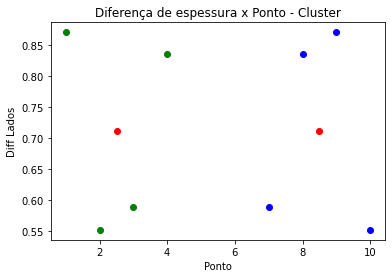

In [34]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Ponto"],data["Diff Lados"],c=color[k])
plt.scatter(Centroids["Ponto"],Centroids["Diff Lados"],c='red')
plt.xlabel('Ponto')
plt.ylabel('Diff Lados')
plt.title("Diferença de espessura x Ponto - Cluster")
plt.show()